In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

nikki bj
mataura pf
saint george bm
cocorit mx
pevek ru
doha kw
mataura pf
kapuskasing ca
gambita co
las vegas us
ahipara nz
mataura pf
tiksi ru
qabis tn
hobart au
khatanga ru
barentsburg sj
cayenne gf
vila franca do campo pt
arraial do cabo br
hermanus za
columbus us
thompson ca
ushuaia ar
rikitea pf
ambilobe mg
tsihombe mg
kuusamo fi
albany au
pangnirtung ca
lakatoro vu
hilo us
arraial do cabo br
lompoc us
hilo us
leh in
kisangani cd
hithadhoo mv
mataura pf
attawapiskat ca
armacao dos buzios br
saskylakh ru
necochea ar
bilma ne
grand river south east mu
ushuaia ar
ushuaia ar
hinesville us
taolanaro mg
ilulissat gl
rikitea pf
victoria sc
chissamba ao
los llanos de aridane es
ushuaia ar
punta arenas cl
albany au
ushuaia ar
taolanaro mg
vostok ru
nosy varika mg
yellowknife ca
lagoa pt
nikolskoye ru
carnarvon au
cherskiy ru
iki-burul ru
san cristobal ec
butaritari ki
ushuaia ar
khatanga ru
azare ng
harper lr
cayenne gf
puerto ayora ec
provideniya ru
bethel us
saint-philippe re
plettenber

soyo ao
tasiilaq gl
sao filipe cv
xiuyan cn
rikitea pf
kapaa us
illoqqortoormiut gl
airai pw
romitan uz
victoria sc
ushuaia ar
beringovskiy ru
thompson ca
vaini to
port alfred za
atuona pf
port alfred za
tiksi ru
touros br
mataura pf
rikitea pf
rikitea pf
hithadhoo mv
chara ru
nizhneyansk ru
sao filipe cv
olafsvik is
rikitea pf
yumen cn
butaritari ki
provideniya ru
barrow us
port alfred za
hovd mn
victoria sc
enterprise us
dukat ru
ushuaia ar
kodiak us
busselton au
robertsport lr
hilo us
hermanus za
fenoarivo mg
leshukonskoye ru
bilma ne
tuktoyaktuk ca
tuktoyaktuk ca
harnosand se
mataura pf
lebu cl
chifeng cn
saint-philippe re
la peca pe
saint-philippe re
dikson ru
ribeira grande pt
puerto madero mx
erenhot cn
butaritari ki
upernavik gl
egvekinot ru
makanya tz
mataura pf
dikson ru
copiapo cl
tiksi ru
les cayes ht
lorengau pg
kamwenge ug
amderma ru
jamestown sh
tasiilaq gl
grindavik is
vaini to
albany au
victoria sc
bluff nz
kruisfontein za
voh nc
hermanus za
mar del plata ar
pierre us


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key 

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00bf7ae140415ed2a07d2a0ace3c9b85


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikki
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | cocorit
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | doha
Processing Record 7 of Set 1 | kapuskasing
Processing Record 8 of Set 1 | gambita
City not found. Skipping...
Processing Record 9 of Set 1 | las vegas
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | qabis
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | columbus
Processing Record 21 of Set 1 | thomps

Processing Record 37 of Set 4 | russell
Processing Record 38 of Set 4 | port blair
Processing Record 39 of Set 4 | boyolangu
Processing Record 40 of Set 4 | tanout
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | nizhnevartovsk
Processing Record 44 of Set 4 | la rioja
Processing Record 45 of Set 4 | monrovia
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | sterlibashevo
Processing Record 48 of Set 4 | trairi
Processing Record 49 of Set 4 | vao
Processing Record 50 of Set 4 | pontianak
Processing Record 1 of Set 5 | sabzevar
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | tyrma
Processing Record 5 of Set 5 | oum hadjer
Processing Record 6 of Set 5 | sinnamary
Processing Record 7 of Set 5 | dukat
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 

Processing Record 28 of Set 8 | west mifflin
Processing Record 29 of Set 8 | chicama
Processing Record 30 of Set 8 | sakaiminato
Processing Record 31 of Set 8 | sibolga
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | sao filipe
Processing Record 34 of Set 8 | xiuyan
Processing Record 35 of Set 8 | romitan
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | yumen
Processing Record 38 of Set 8 | enterprise
Processing Record 39 of Set 8 | robertsport
Processing Record 40 of Set 8 | fenoarivo
Processing Record 41 of Set 8 | leshukonskoye
Processing Record 42 of Set 8 | harnosand
Processing Record 43 of Set 8 | chifeng
Processing Record 44 of Set 8 | la peca
Processing Record 45 of Set 8 | puerto madero
Processing Record 46 of Set 8 | erenhot
Processing Record 47 of Set 8 | egvekinot
Processing Record 48 of Set 8 | makanya
Processing Record 49 of Set 8 | copiapo
Processing Record 50 of Set 8 | les cayes
Processing Record 1 of Set 9 | kamwenge
Proces

Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | dudinka
Processing Record 22 of Set 12 | balakhninskiy
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | vitim
Processing Record 25 of Set 12 | mocuba
Processing Record 26 of Set 12 | yeniseysk
Processing Record 27 of Set 12 | san buenaventura
Processing Record 28 of Set 12 | la ronge
Processing Record 29 of Set 12 | yatou
Processing Record 30 of Set 12 | ust-tsilma
Processing Record 31 of Set 12 | cascais
Processing Record 32 of Set 12 | tanete
Processing Record 33 of Set 12 | zaysan
Processing Record 34 of Set 12 | skovorodino
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | sisimiut
Processing Record 37 of Set 12 | isabela
Processing Record 38 of Set 12 | ornskoldsvik
Processing Record 39 of Set 12 | bejar
Processing Record 40 of Set 12 | yeppoon
Processing Record 41 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 42 of Set 12 | jilmah
City not 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikki,9.94,3.21,97.27,13,94,3.74,BJ,2020-12-05 14:41:28
1,Mataura,-46.19,168.86,48.00,81,23,1.99,NZ,2020-12-05 14:41:28
2,Saint George,37.10,-113.58,28.40,36,1,2.86,US,2020-12-05 14:39:15
3,Cocorit,27.58,-109.97,41.00,56,5,3.36,MX,2020-12-05 14:41:29
4,Pevek,69.70,170.31,0.48,90,64,9.17,RU,2020-12-05 14:41:29
5,Doha,25.29,51.53,80.60,78,20,12.75,QA,2020-12-05 14:41:29
6,Kapuskasing,49.42,-82.43,14.00,92,69,3.36,CA,2020-12-05 14:41:29
7,Las Vegas,36.17,-115.14,39.99,29,1,4.70,US,2020-12-05 14:37:37
8,Ahipara,-35.17,173.17,58.28,86,33,8.08,NZ,2020-12-05 14:41:30
9,Tiksi,71.69,128.87,-14.55,88,38,6.64,RU,2020-12-05 14:41:30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1607180168.5200136

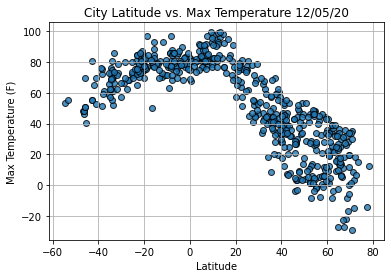

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

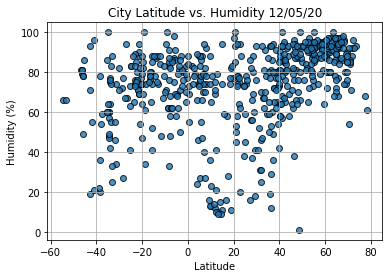

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

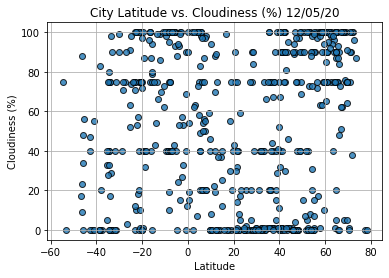

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

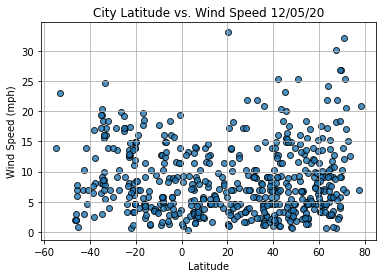

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13


City          Vila Franca Do Campo
Lat                          37.72
Lng                         -25.43
Max Temp                        59
Humidity                        72
Cloudiness                      75
Wind Speed                    9.17
Country                         PT
Date           2020-12-05 14:41:31
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
548     True
549     True
550    False
551     True
552     True
Name: Lat, Length: 553, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikki,9.94,3.21,97.27,13,94,3.74,BJ,2020-12-05 14:41:28
2,Saint George,37.10,-113.58,28.40,36,1,2.86,US,2020-12-05 14:39:15
3,Cocorit,27.58,-109.97,41.00,56,5,3.36,MX,2020-12-05 14:41:29
4,Pevek,69.70,170.31,0.48,90,64,9.17,RU,2020-12-05 14:41:29
5,Doha,25.29,51.53,80.60,78,20,12.75,QA,2020-12-05 14:41:29


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

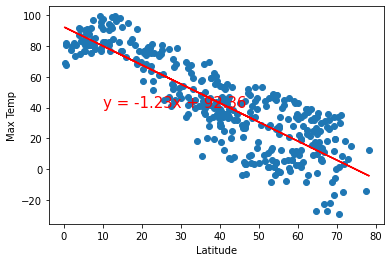

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

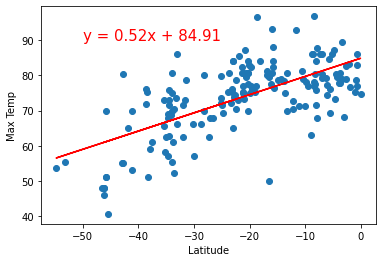

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

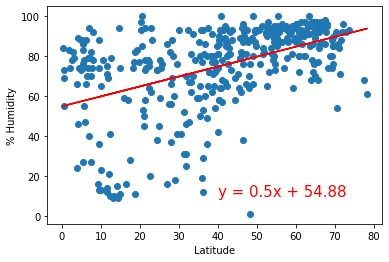

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

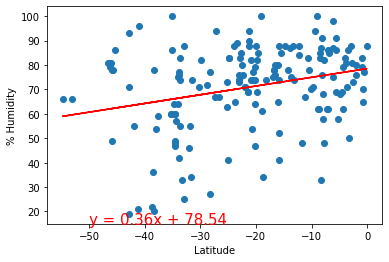

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

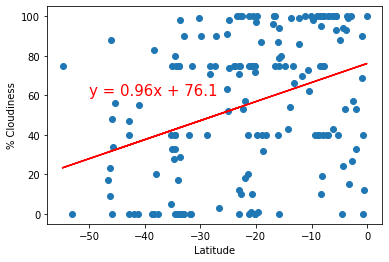

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       n for % Cloudiness', '% Cloudiness',(-50,60))

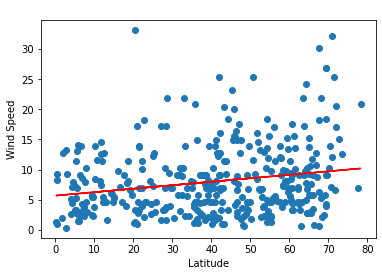

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                      n for Wind Speed', 'Wind Speed',(40,35))

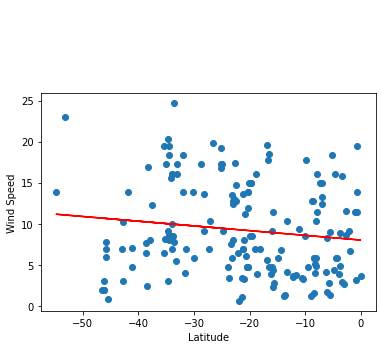

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                      n for Wind Speed', 'Wind Speed',(-50,35))